In [1]:
import pandas as pd

# Load the dataset
file_path = 'veri-seti.txt'
columns = [
    "Number of times pregnant",
    "Plasma glucose concentration",
    "Diastolic blood pressure",
    "Triceps skinfold thickness",
    "2-Hour serum insulin",
    "Body mass index",
    "Diabetes pedigree function",
    "Age",
    "Class variable"
]

# Using the column names as provided in the assignment description
data = pd.read_csv(file_path, header=None, names=columns)

# Display the first few rows of the dataframe to verify it's loaded correctly
data.head(), data.describe()


(                  Number of times pregnant  Plasma glucose concentration  \
 0    6\t148\t72\t35\t0\t33.6\t0.627\t50\t1                           NaN   
 1     1\t85\t66\t29\t0\t26.6\t0.351\t31\t0                           NaN   
 2     8\t183\t64\t0\t0\t23.3\t0.672\t32\t1                           NaN   
 3    1\t89\t66\t23\t94\t28.1\t0.167\t21\t0                           NaN   
 4  0\t137\t40\t35\t168\t43.1\t2.288\t33\t1                           NaN   
 
    Diastolic blood pressure  Triceps skinfold thickness  2-Hour serum insulin  \
 0                       NaN                         NaN                   NaN   
 1                       NaN                         NaN                   NaN   
 2                       NaN                         NaN                   NaN   
 3                       NaN                         NaN                   NaN   
 4                       NaN                         NaN                   NaN   
 
    Body mass index  Diabetes pedigree fun

In [2]:
# Correctly load the dataset with tab as the delimiter
data = pd.read_csv(file_path, header=None, names=columns, delimiter='\t')

# Display the first few rows of the dataframe to verify correct loading and provide descriptive statistics
data.head(), data.describe()


(   Number of times pregnant  Plasma glucose concentration  \
 0                         6                           148   
 1                         1                            85   
 2                         8                           183   
 3                         1                            89   
 4                         0                           137   
 
    Diastolic blood pressure  Triceps skinfold thickness  2-Hour serum insulin  \
 0                        72                          35                     0   
 1                        66                          29                     0   
 2                        64                           0                     0   
 3                        66                          23                    94   
 4                        40                          35                   168   
 
    Body mass index  Diabetes pedigree function  Age  Class variable  
 0             33.6                       0.627   50         

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Separating features and target variable
X = data.drop('Class variable', axis=1)
y = data['Class variable']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Normalizing the features
X_normalized = scaler.fit_transform(X)

# Creating a DataFrame for the normalized features to display and use further
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Display the first few rows of the normalized features
X_normalized_df.head()


,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [4]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# PCA for dimensionality reduction
pca = PCA(n_components=2)  # Requesting the top 2 principal components
X_pca = pca.fit_transform(X_normalized)

# LDA for dimensionality reduction
lda = LDA(n_components=1)  # LDA can only output n_classes-1 features for classification, hence n_components=1
X_lda = lda.fit_transform(X_normalized, y)

# Explained variance ratio by PCA components
pca_explained_variance = pca.explained_variance_ratio_

# LDA does not have explained variance like PCA, but the coefficients can indicate feature importance
lda_coefficients = lda.coef_

pca_explained_variance, lda_coefficients


(array([0.31192249, 0.21186663]),
 array([[ 2.20574287,  7.42343568, -1.79256943,  0.09638944, -0.96236705,
          5.59954666,  2.17277766,  0.99104565]]))

In [5]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Checking the shapes of the splits to ensure correctness
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((537, 8), (231, 8), (537,), (231,))

In [6]:
# PCA ve LDA için daha önce yapılan işlemleri tekrar uygulama
pca = PCA(n_components=2)  # İlk iki ana bileşeni istiyoruz
X_pca = pca.fit_transform(X_normalized)

lda = LDA(n_components=1)  # LDA, sınıflandırma için maksimum n_classes-1 özellik çıkarabilir
X_lda = lda.fit_transform(X_normalized, y)

# PCA tarafından açıklanan varyans oranları
pca_explained_variance = pca.explained_variance_ratio_

# LDA katsayıları, özniteliklerin sınıfları ayırt etmedeki önemini gösterir
lda_coefficients = lda.coef_

pca_explained_variance, lda_coefficients


(array([0.31192249, 0.21186663]),
 array([[ 2.20574287,  7.42343568, -1.79256943,  0.09638944, -0.96236705,
          5.59954666,  2.17277766,  0.99104565]]))

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Karar ağacı modelinin oluşturulması ve eğitilmesi
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma
y_pred = dt_classifier.predict(X_test)

# Performans metriklerinin hesaplanması
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix, accuracy, precision, recall, f1


(array([[107,  44],
        [ 25,  55]], dtype=int64),
 0.7012987012987013,
 0.5555555555555556,
 0.6875,
 0.6145251396648045)

In [8]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes modelinin oluşturulması ve eğitilmesi
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma
y_pred_nb = nb_classifier.predict(X_test)

# Performans metriklerinin hesaplanması
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

conf_matrix_nb, accuracy_nb, precision_nb, recall_nb, f1_nb


(array([[119,  32],
        [ 27,  53]], dtype=int64),
 0.7445887445887446,
 0.6235294117647059,
 0.6625,
 0.6424242424242423)

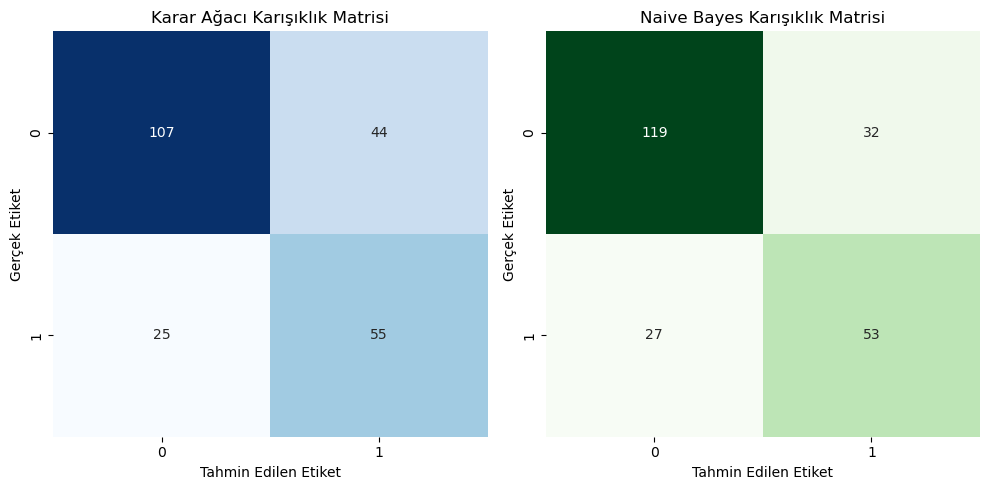

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Karar Ağacı Sınıflandırıcısı için Karışıklık Matrisi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Karar Ağacı Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")

# Naive Bayes için Karışıklık Matrisi
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Naive Bayes Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")

plt.tight_layout()
plt.show()


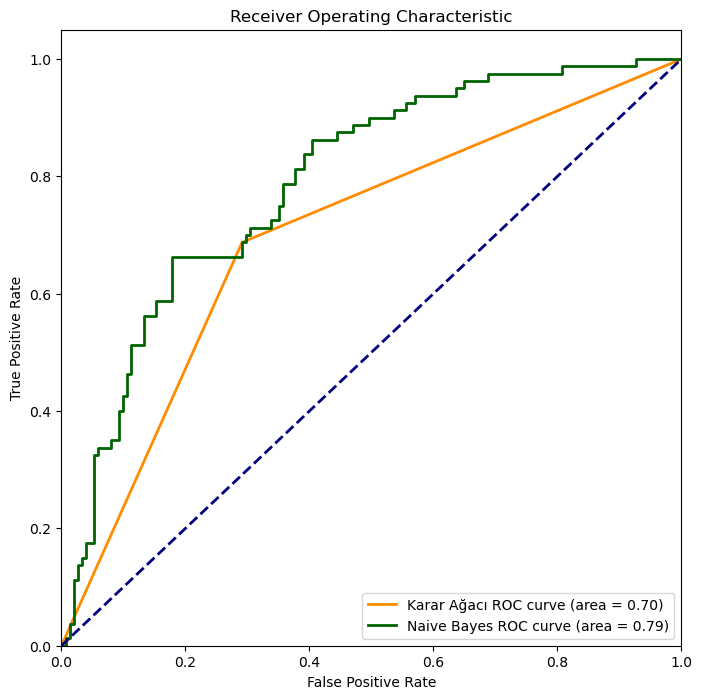

In [10]:
from sklearn.metrics import roc_curve, auc

# Karar Ağacı ve Naive Bayes için ROC eğrileri ve AUC skorları
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test)[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

# ROC eğrisinin çizdirilmesi
plt.figure(figsize=(8, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Karar Ağacı ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='darkgreen', lw=2, label='Naive Bayes ROC curve (area = %0.2f)' % roc_auc_nb)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


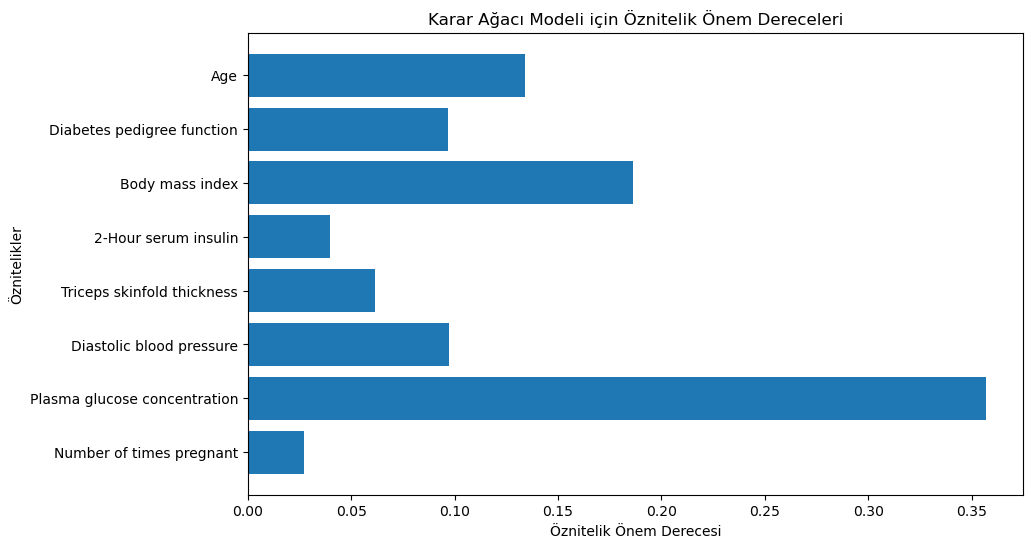

In [11]:
# Karar Ağacı Modeli için Öznitelik Önem Dereceleri
feature_importances = dt_classifier.feature_importances_

# Özniteliklerin önem derecelerinin çubuk grafikle gösterilmesi
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), feature_importances, align='center')
plt.yticks(range(X_train.shape[1]), columns[:-1])  # Sınıf değişkeni haricindeki tüm sütun isimleri
plt.xlabel('Öznitelik Önem Derecesi')
plt.ylabel('Öznitelikler')
plt.title('Karar Ağacı Modeli için Öznitelik Önem Dereceleri')
plt.show()
